In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from typing import List

In [2]:
parent_dir = './Data/In-lab/'
paths = np.array(list(os.listdir(parent_dir)))
np.random.shuffle(paths)
training_paths = paths[:-4]
validation_paths = paths[-4:]

def load_data_from_volunteer(path:str):
    df = pd.read_csv(path.rstrip('/')+'/labeledfeatures.csv')
    df = df[~df['EventType'].isna()]
    df = df.loc[:, 'mean':"EventType"]
    label_map = {r'[.]*[Rr][Ee][Ss][Tt][.]*': 0,
                 r'[.]*': 1}
    df['EventType'] = df['EventType'].replace(regex=label_map)
    arr = df.to_numpy()
    # 0-1 normalization
    arr -= arr.min(axis=0)
    arr /= arr.max(axis=0)
    return arr


def load_data(paths: List[str]):
    data = []
    for path in paths:
        data.append(load_data_from_volunteer(parent_dir + path))
    return np.concatenate(data, axis=0)

trainX = load_data(training_paths)
valX = load_data(validation_paths)

trainX, trainY = trainX[:, :-1], trainX[:, -1]
valX, valY = valX[:, :-1], valX[:, -1]

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(trainX)
trainX = scaler.transform(trainX)
valX = scaler.transform(valX)


In [4]:
from sklearn.svm import SVC


svm_clf = SVC(class_weight='balanced')
svm_clf.fit(trainX, trainY)
pred_train_y = svm_clf.predict(trainX)
pred_val_y = svm_clf.predict(valX)

acc_train = accuracy_score(trainY, pred_train_y)
acc_val = accuracy_score(valY, pred_val_y)

print(f'Training Accuracy: {acc_train} | Validation Accuracy: {acc_val}')

Training Accuracy: 0.787030213706706 | Validation Accuracy: 0.6767895878524945


In [5]:
from sklearn.neighbors import KNeighborsClassifier


knn_clf = KNeighborsClassifier()
knn_clf.fit(trainX, trainY)
pred_train_y = knn_clf.predict(trainX)
pred_val_y = knn_clf.predict(valX)

acc_train = accuracy_score(trainY, pred_train_y)
acc_val = accuracy_score(valY, pred_val_y)

print(f'Training Accuracy: {acc_train} | Validation Accuracy: {acc_val}')

Training Accuracy: 0.8518791451731761 | Validation Accuracy: 0.6550976138828634


In [6]:
from sklearn.linear_model import LogisticRegression


LR_clf = LogisticRegression(class_weight='balanced')
LR_clf.fit(trainX, trainY)
pred_train_y = LR_clf.predict(trainX)
pred_val_y = LR_clf.predict(valX)

acc_train = accuracy_score(trainY, pred_train_y)
acc_val = accuracy_score(valY, pred_val_y)

print(f'Training Accuracy: {acc_train} | Validation Accuracy: {acc_val}')

Training Accuracy: 0.7251289609432572 | Validation Accuracy: 0.6832971800433839


/home/cmaspi/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier(class_weight='balanced')
rf_clf.fit(trainX, trainY)
pred_train_y = rf_clf.predict(trainX)
pred_val_y = rf_clf.predict(valX)

acc_train = accuracy_score(trainY, pred_train_y)
acc_val = accuracy_score(valY, pred_val_y)

print(f'Training Accuracy: {acc_train} | Validation Accuracy: {acc_val}')

Training Accuracy: 1.0 | Validation Accuracy: 0.7049891540130152


In [16]:
# LOSO

from sklearn.model_selection import LeaveOneGroupOut
from sklearn.ensemble import RandomForestClassifier

def load_data_ret_groups(paths: List[str]):
    data = []
    groups = []
    for idx, path in enumerate(paths):
        temp = load_data_from_volunteer(parent_dir + path)
        data.append(temp)
        groups.append([idx]*temp.shape[0])
    return np.concatenate(data, axis=0), np.concatenate(groups, axis=0)

dataX, groups = load_data_ret_groups(paths)
X, y = dataX[:, :-1], dataX[:,-1]
logo = LeaveOneGroupOut()

for i, (train_index, test_index) in enumerate(logo.split(X, y, groups)):
    trainX, trainY = X[train_index], y[train_index]
    valX, valY = X[test_index], y[test_index]
    rf_clf = RandomForestClassifier(class_weight='balanced')
    rf_clf.fit(trainX, trainY)
    pred_train_y = rf_clf.predict(trainX)
    pred_val_y = rf_clf.predict(valX)
    
    acc_train = accuracy_score(trainY, pred_train_y)
    acc_val = accuracy_score(valY, pred_val_y)

    print(f'Training Accuracy: {acc_train} | Validation Accuracy: {acc_val}')

Training Accuracy: 1.0 | Validation Accuracy: 0.5585585585585585
Training Accuracy: 1.0 | Validation Accuracy: 0.6036036036036037
Training Accuracy: 1.0 | Validation Accuracy: 0.7456140350877193
Training Accuracy: 1.0 | Validation Accuracy: 0.6929824561403509
Training Accuracy: 1.0 | Validation Accuracy: 0.7288135593220338
Training Accuracy: 1.0 | Validation Accuracy: 0.7767857142857143
Training Accuracy: 1.0 | Validation Accuracy: 0.7876106194690266
Training Accuracy: 1.0 | Validation Accuracy: 0.6846846846846847
Training Accuracy: 1.0 | Validation Accuracy: 0.8508771929824561
Training Accuracy: 1.0 | Validation Accuracy: 0.6991150442477876
Training Accuracy: 1.0 | Validation Accuracy: 0.8214285714285714
Training Accuracy: 1.0 | Validation Accuracy: 0.8333333333333334
Training Accuracy: 1.0 | Validation Accuracy: 0.8938053097345132
Training Accuracy: 1.0 | Validation Accuracy: 0.7058823529411765
Training Accuracy: 1.0 | Validation Accuracy: 0.6666666666666666
Training Accuracy: 1.0 | 

# Plotting separability

In [10]:
df = pd.read_csv('./Data/In-lab/P2/labeledfeatures.csv')
feature_names = df.loc[:1, "mean":"EventType"].columns
feature_map = {feature: i for i, feature in enumerate(feature_names)}

In [11]:
feature_names

Index(['mean', 'standard deviation', 'min', 'max', 'median', 'mode', 'skew',
       'Kurtosis', '80_percentile', '60_percentile', '40_percentile',
       '20_percentile', 'RMS', 'IQR', 'count>mean', 'count<mean', 'range',
       'COV_M', 'pNN50', 'pNN20', 'RMSSD', 'nn50', 'nn20', 'SDSD', 'zcross',
       'Lf', 'MF', 'HF', 'Lf/HF', 'Count', 'EventType'],
      dtype='object')

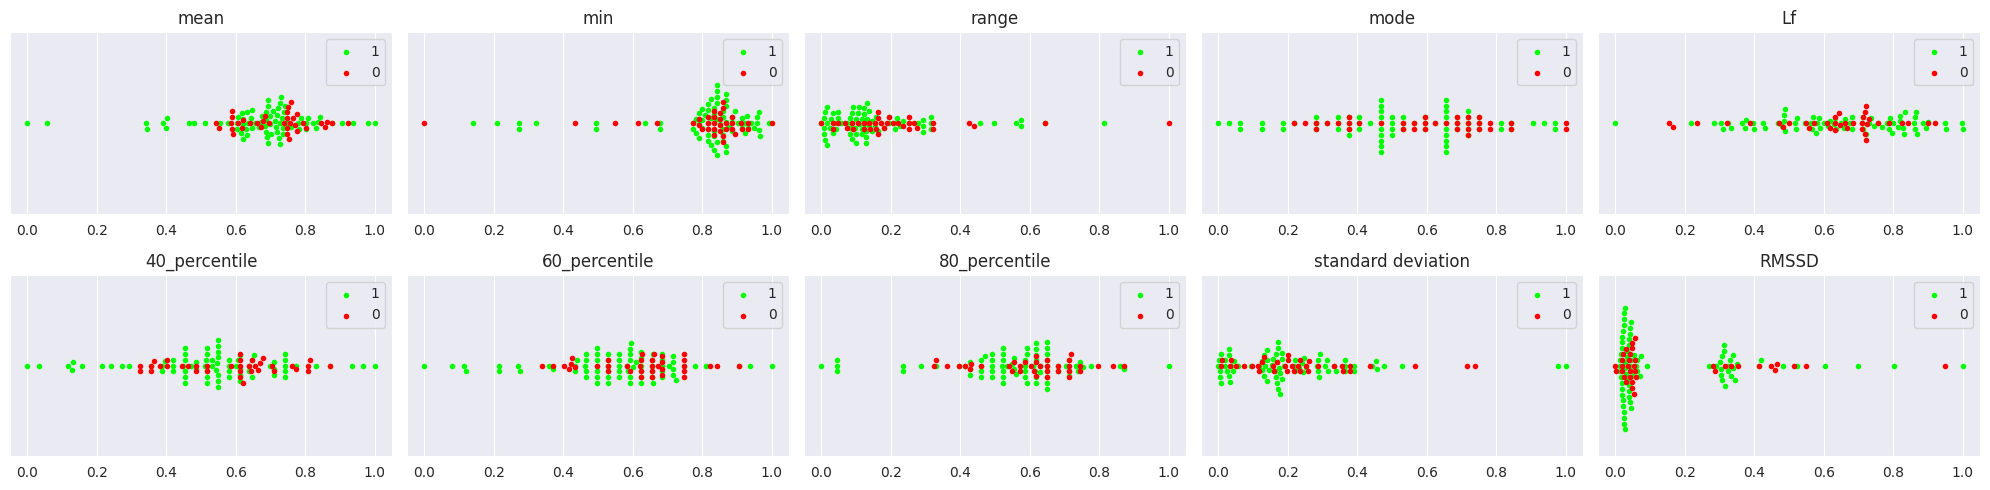

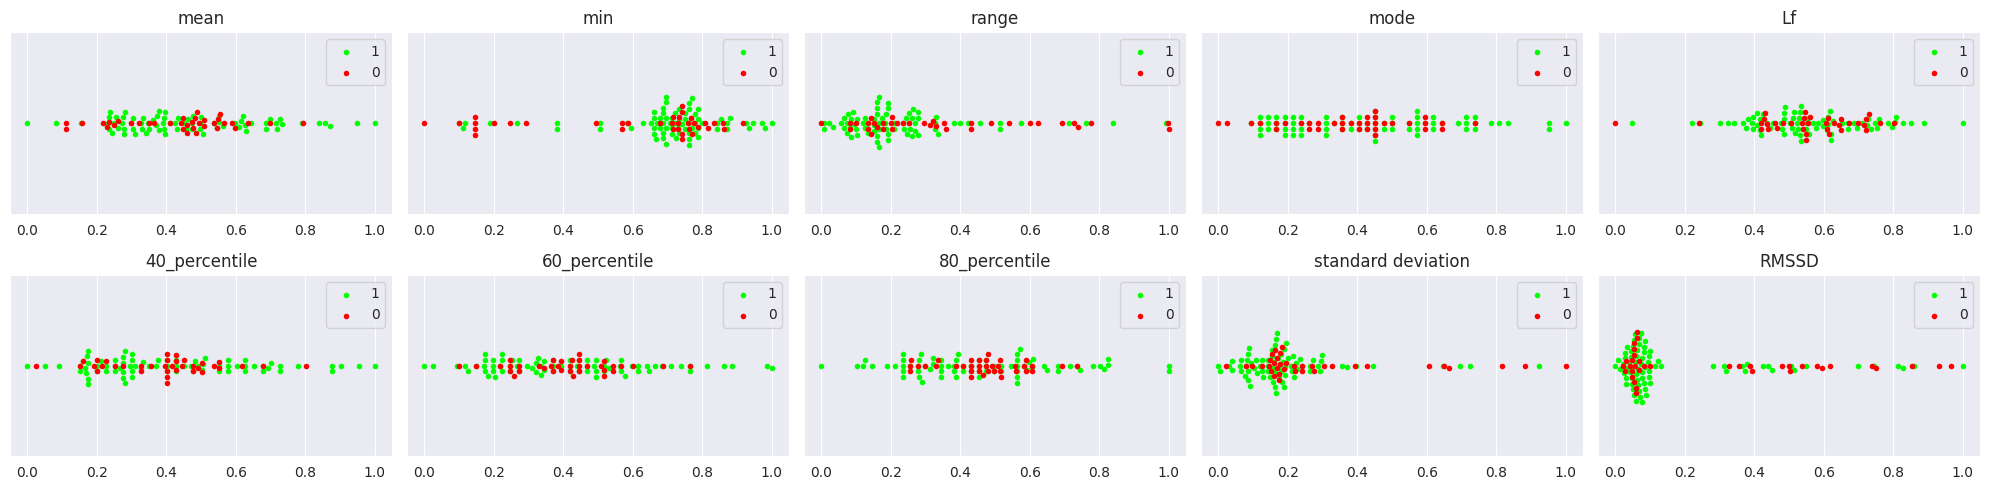

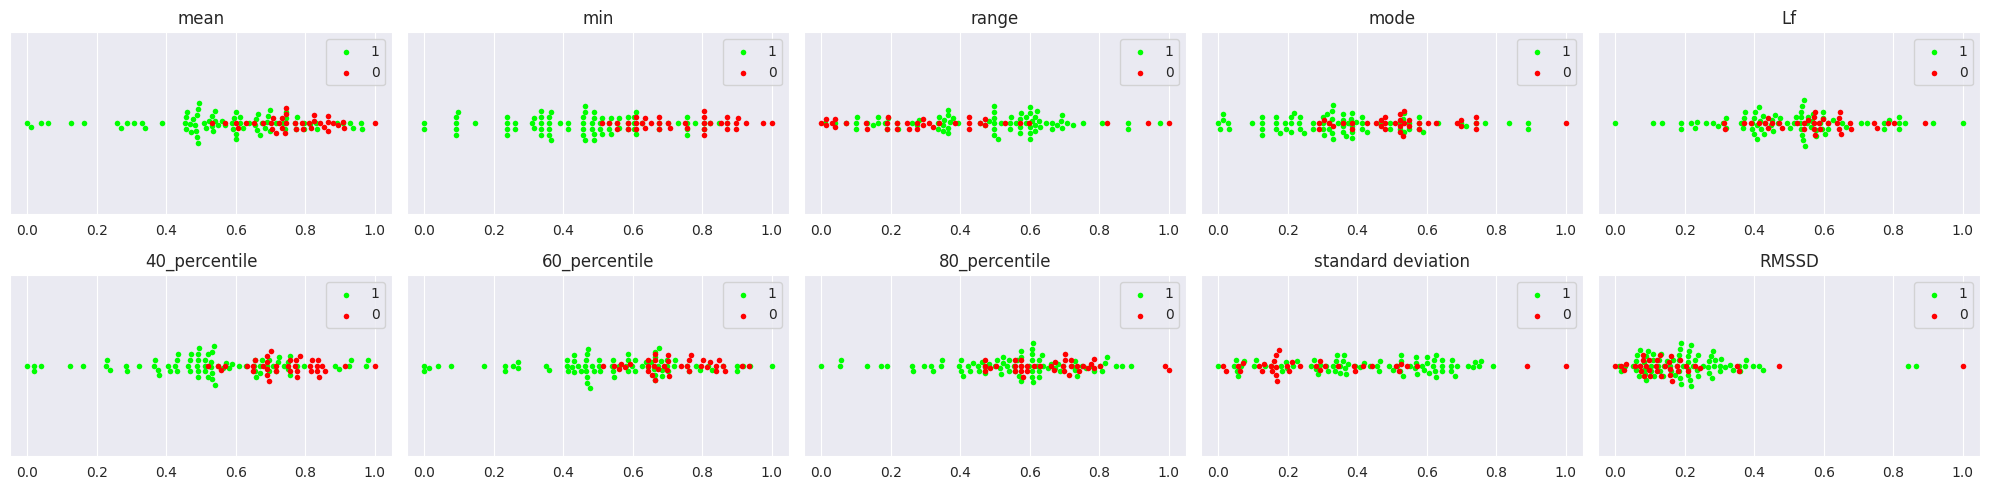

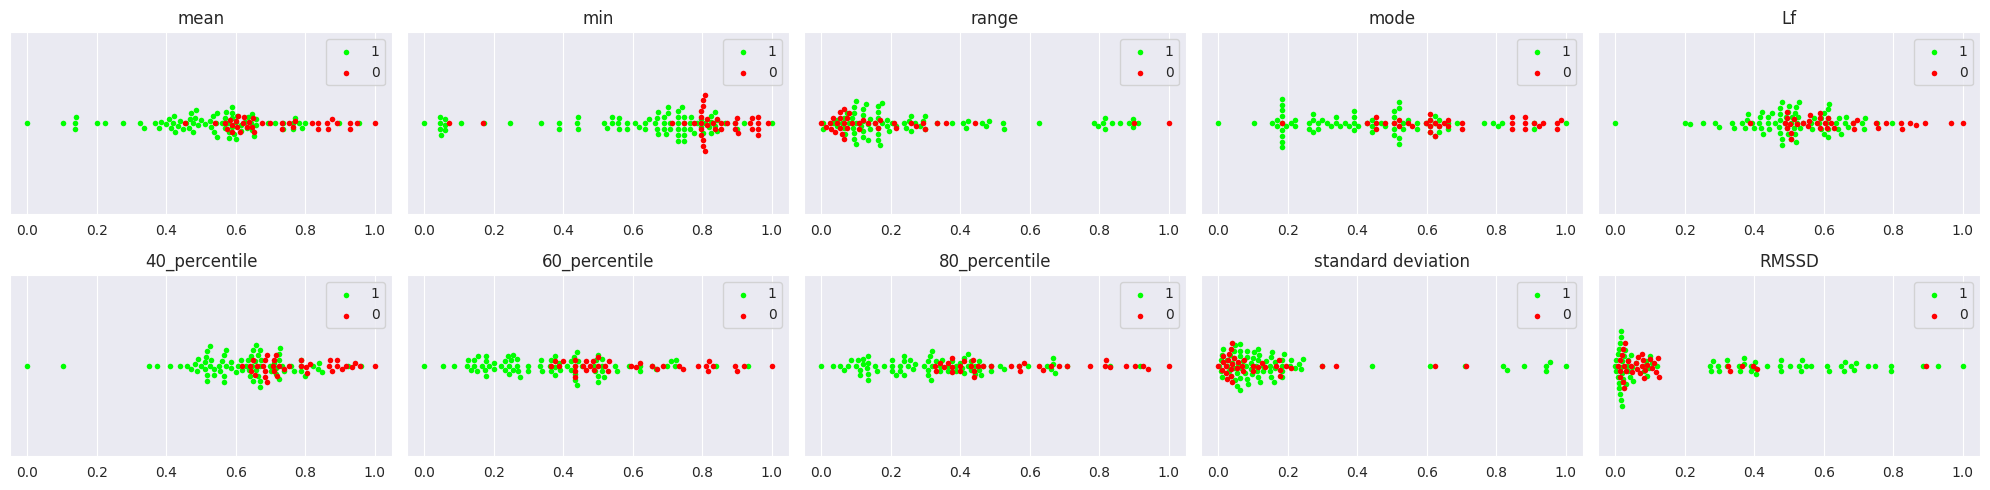

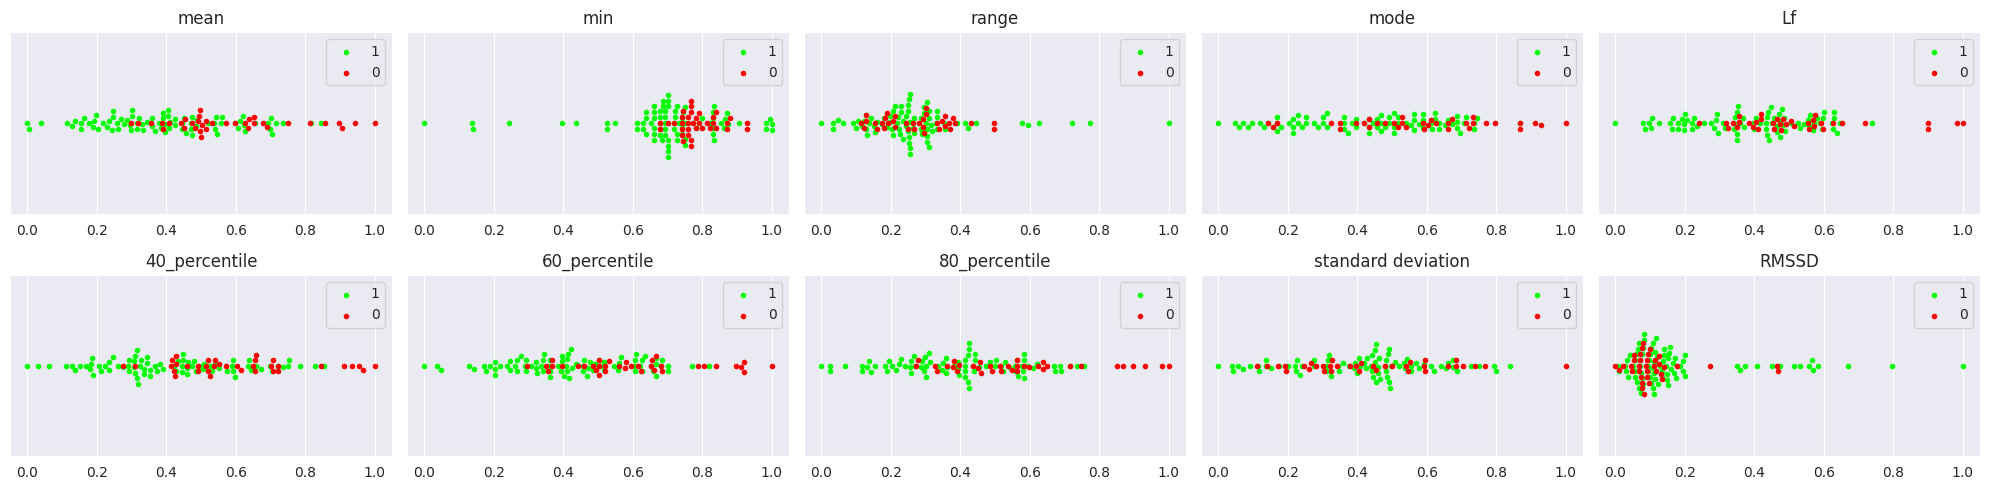

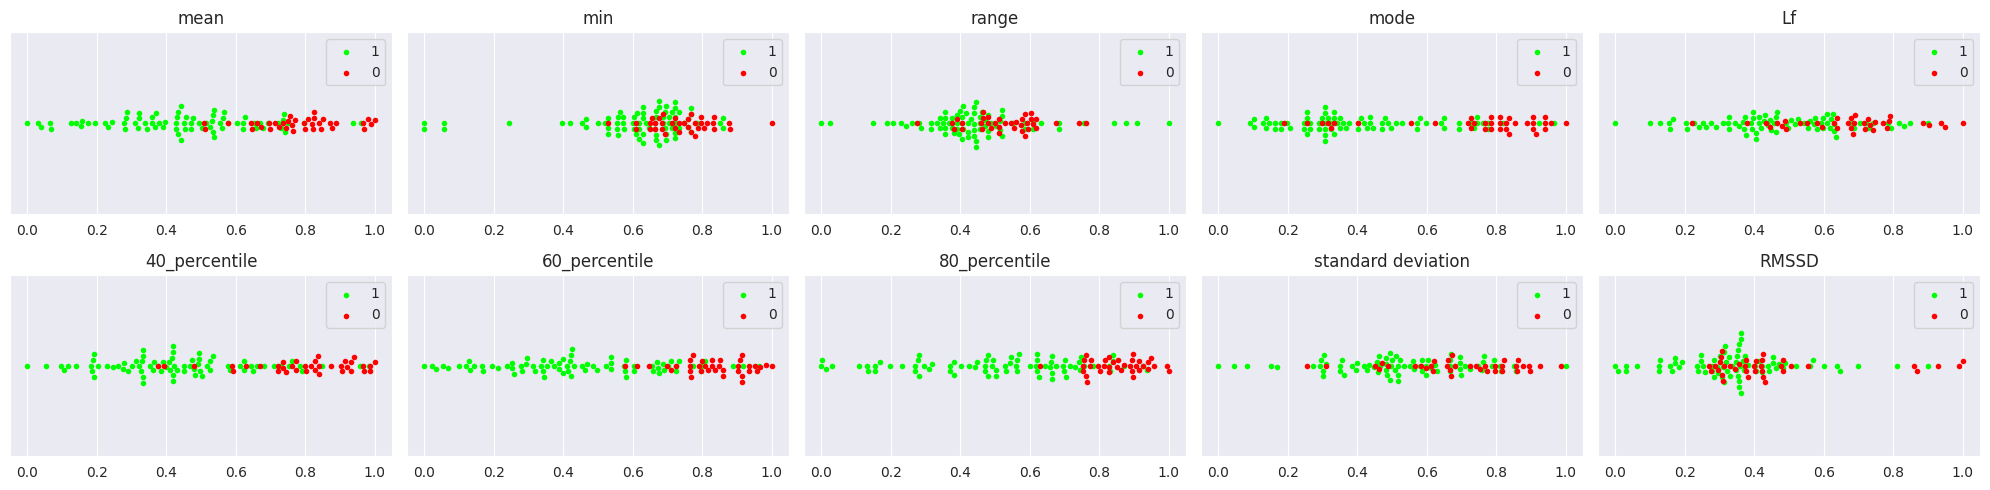

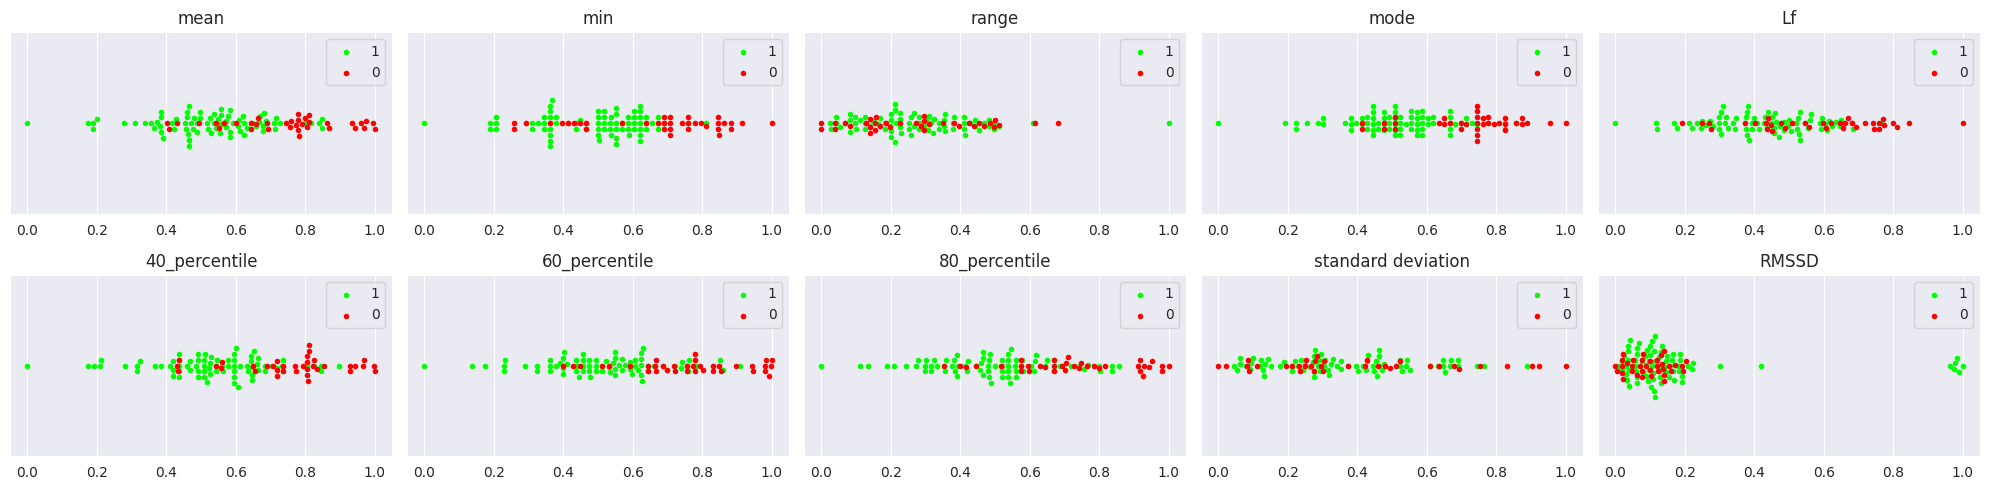

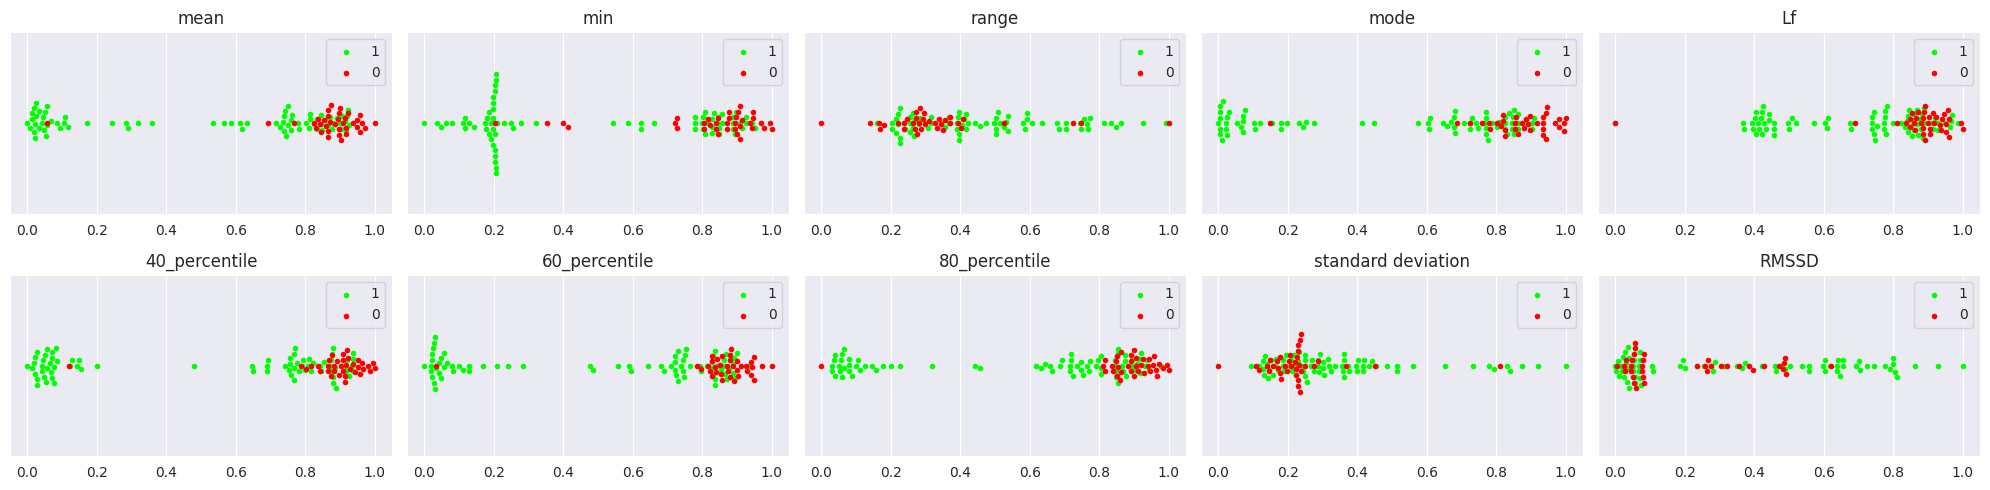

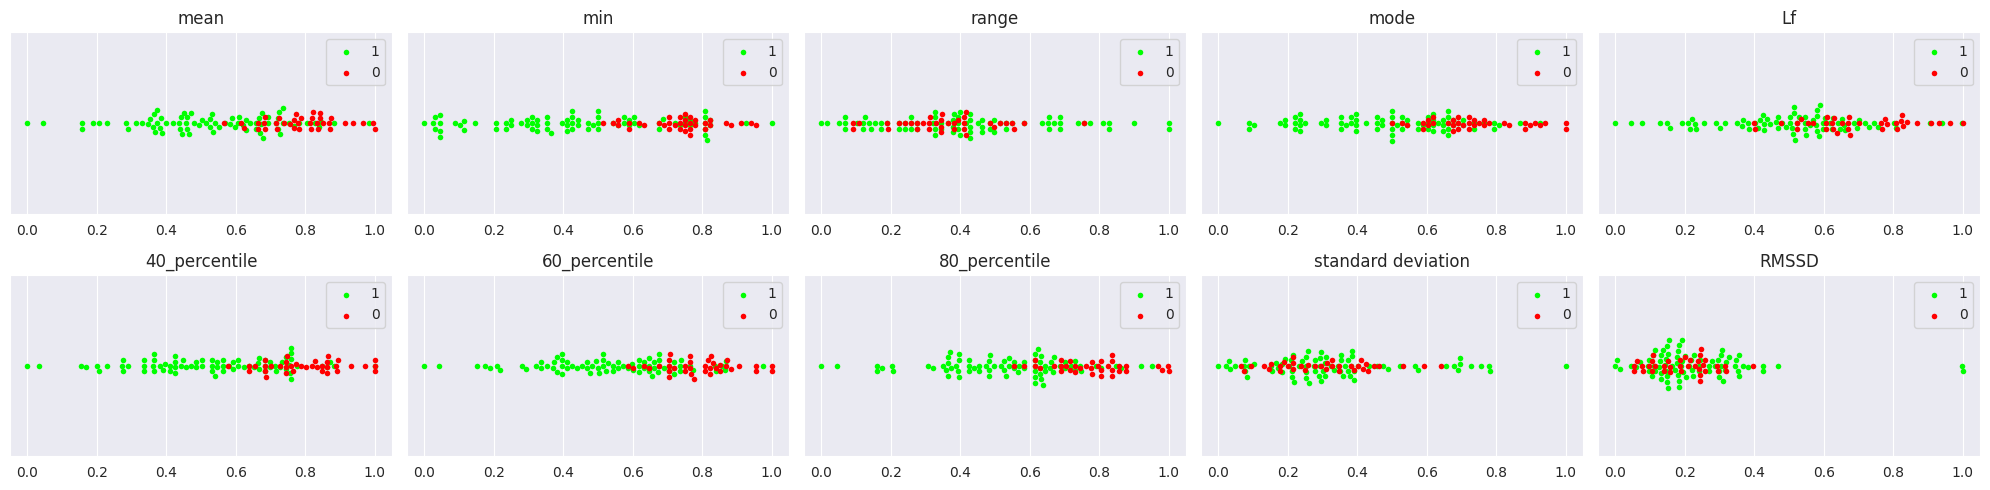

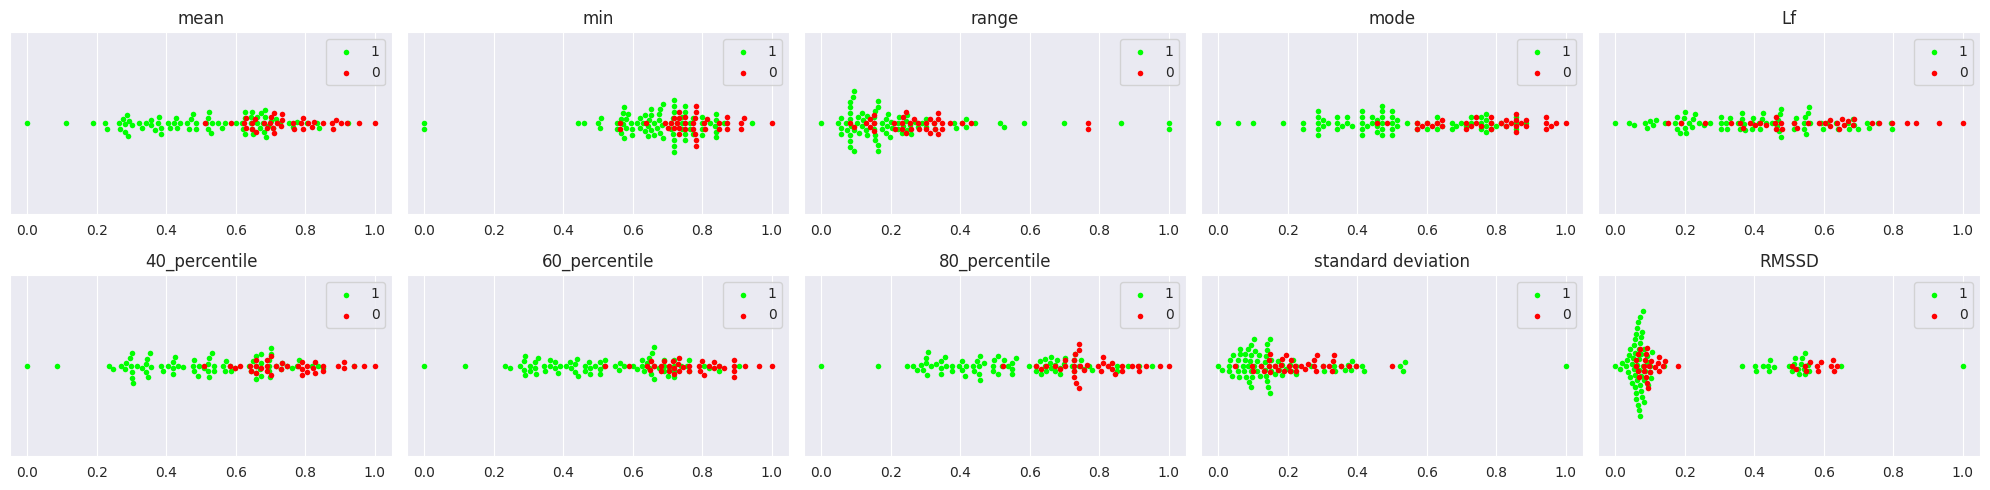

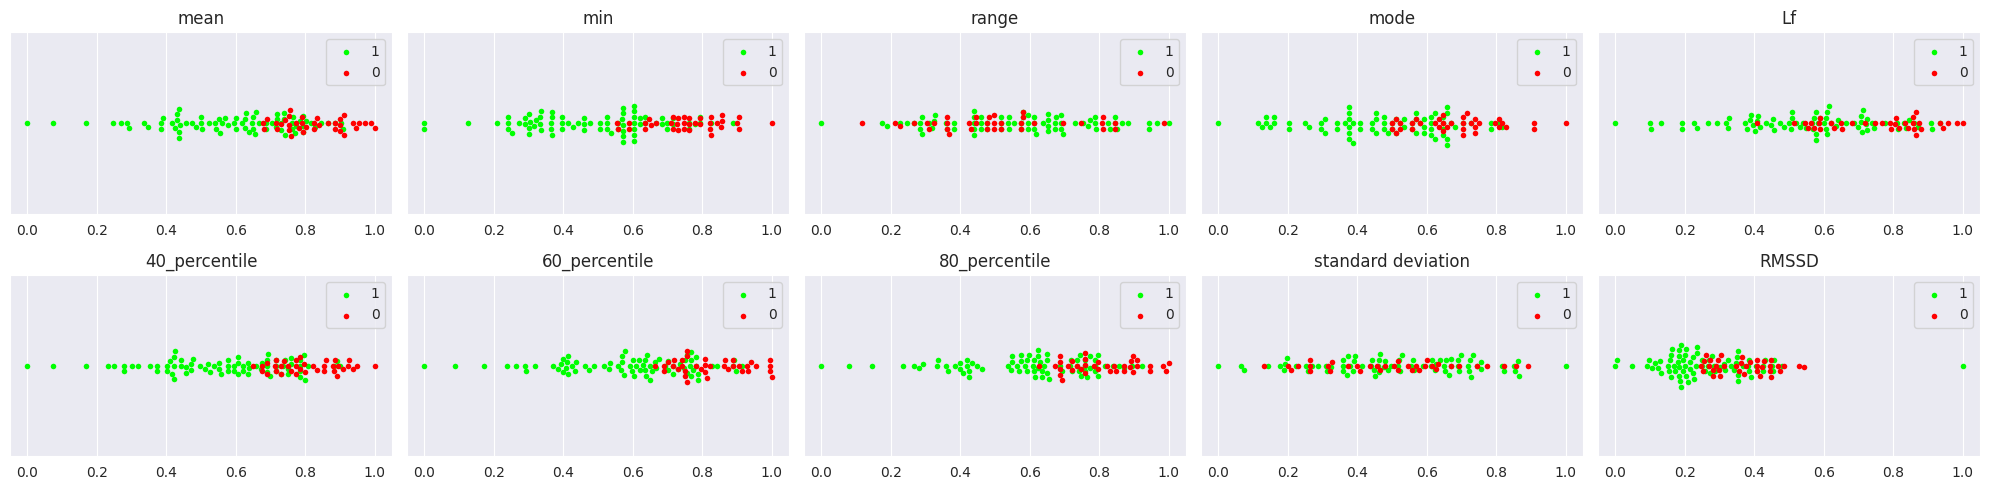

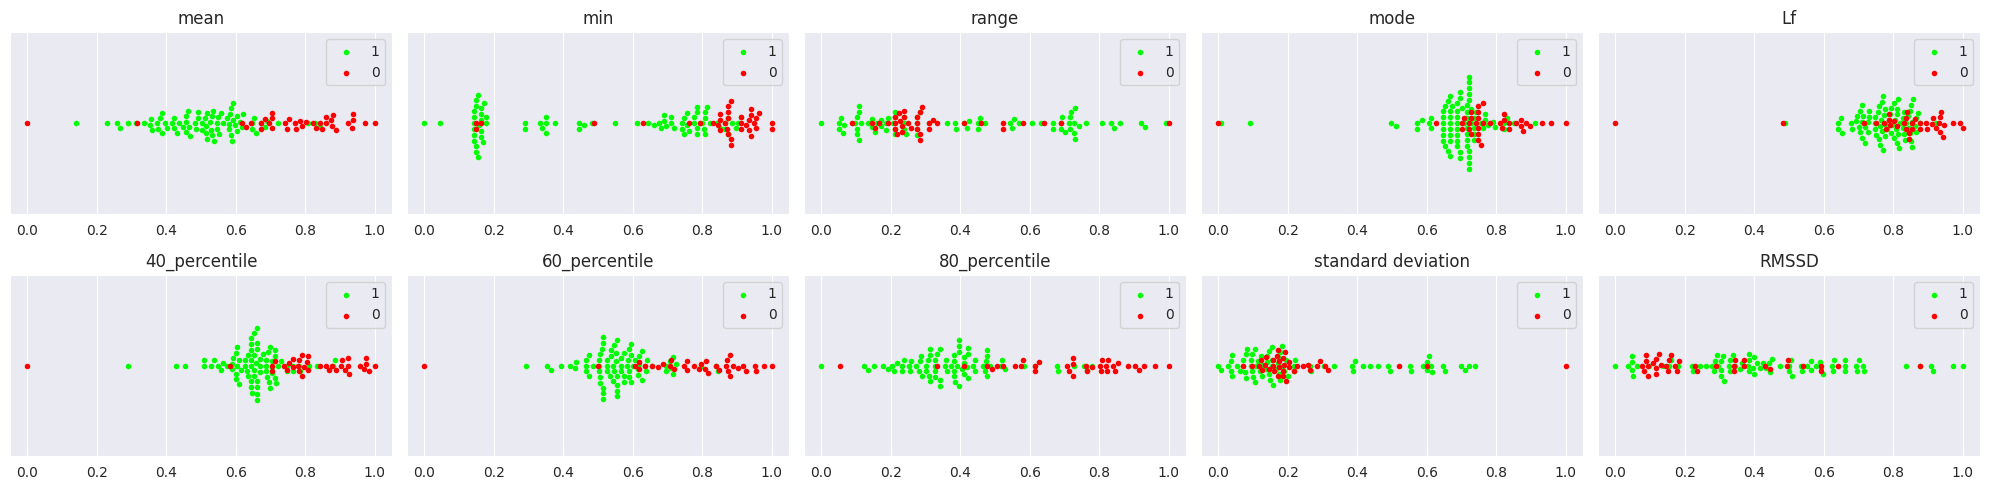

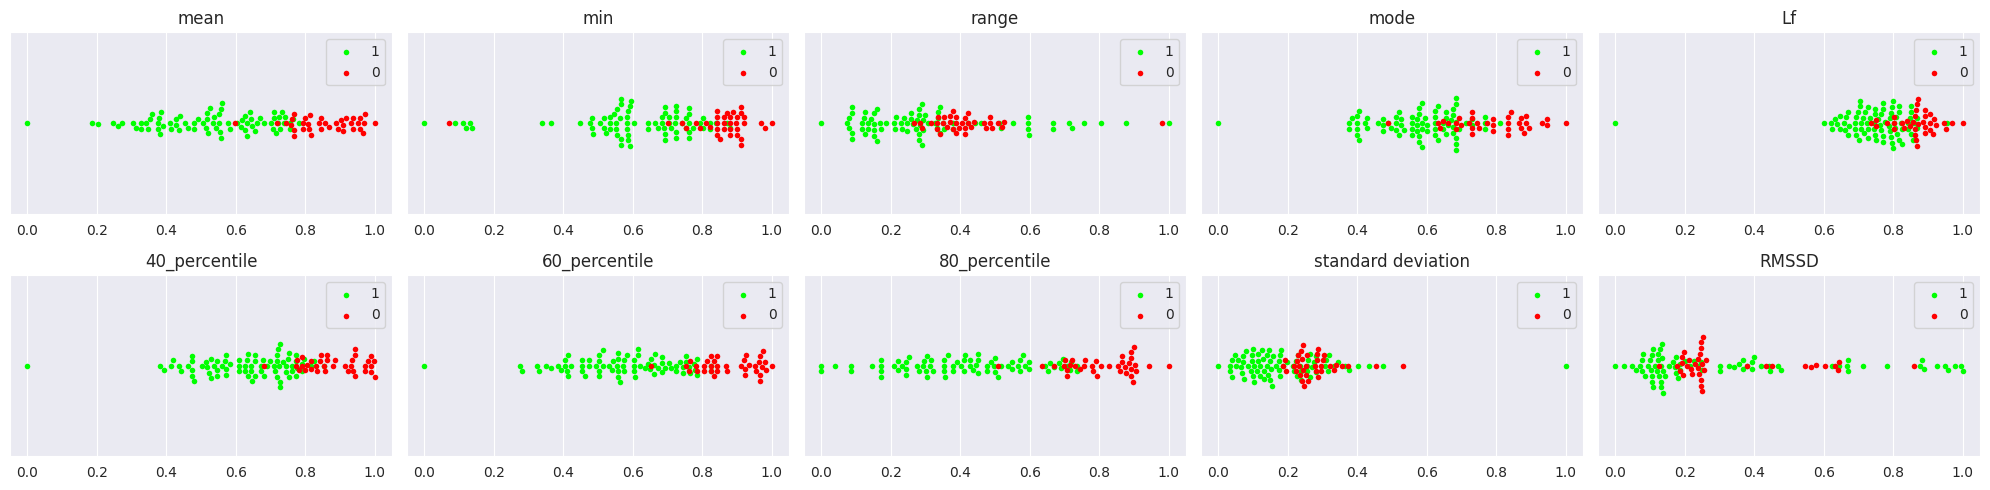

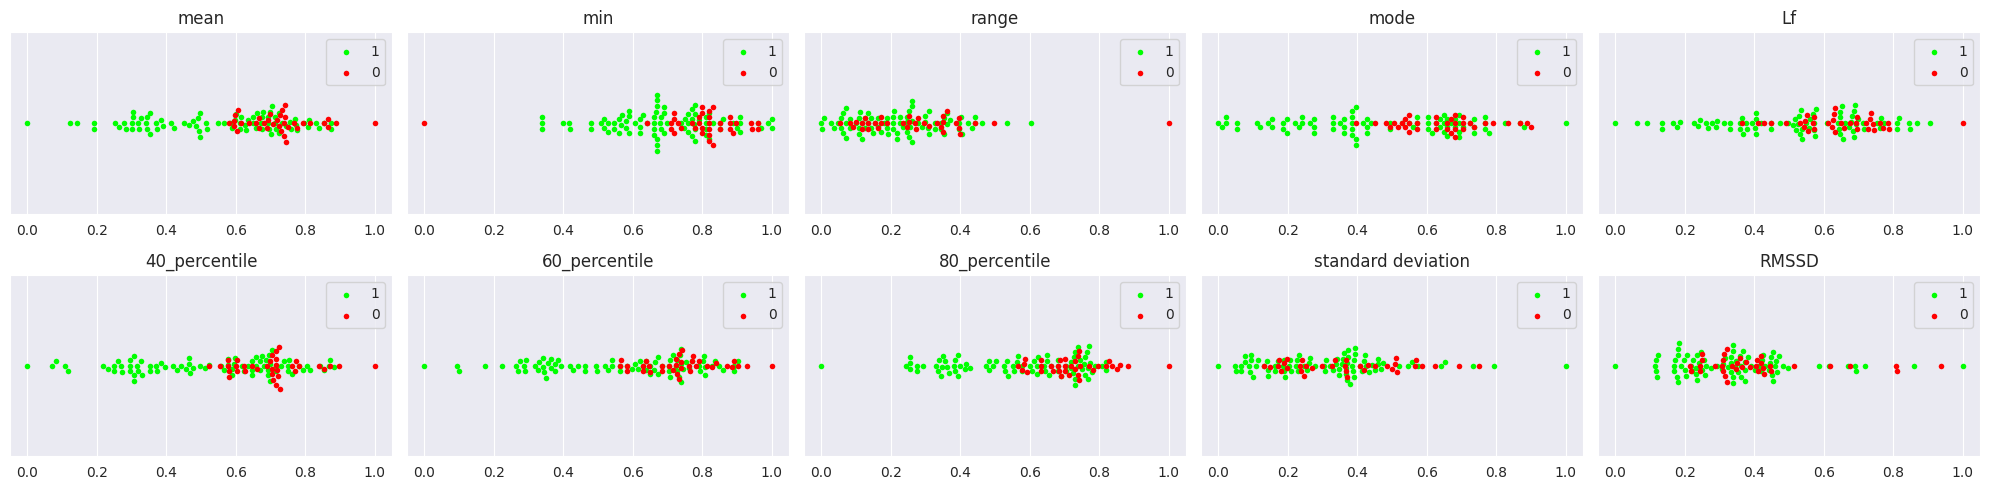

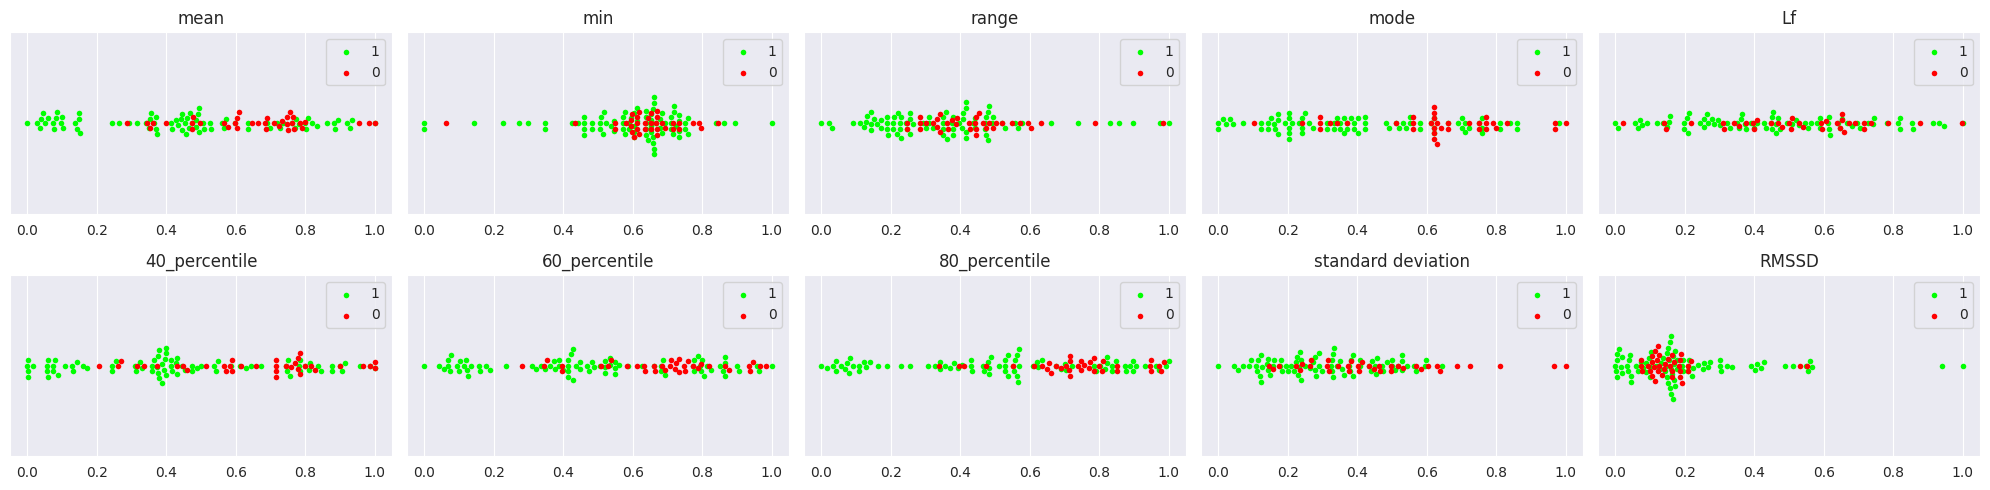

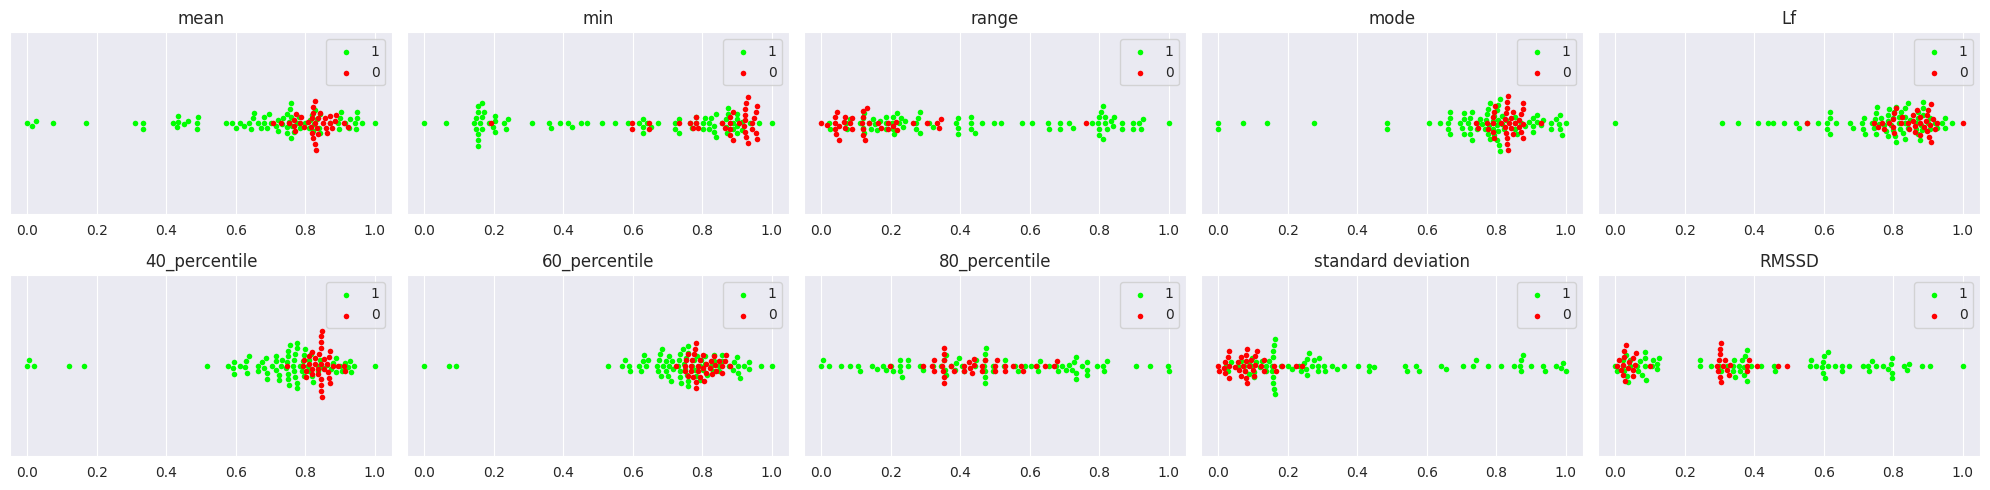

In [12]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

good_features = ['mean', 'min', 'range', 'mode', 'Lf', '40_percentile', '60_percentile', '80_percentile', 'standard deviation', 'RMSSD']


for person_path in paths:
    
    dataX = load_data([person_path])
    labels = dataX[:, feature_map['EventType']]
    positive_labels = labels == 1
    
    if len(good_features) != 10:
        assert "Change the figure configuration in the next line if the number of features used are not 10"
    
    fig, ax = plt.subplots(2, 5, figsize=(20, 5))
    ax = np.array(ax)
    ax = ax.flatten()
    
    for i, feature in enumerate(good_features):
        data_feature = dataX[:, feature_map[feature]]
        sns.swarmplot(x=data_feature[positive_labels], label='1', s=4, color='lime', ax=ax[i])
        sns.swarmplot(x=data_feature[~positive_labels], label='0', s=4, color='red', ax=ax[i])
        ax[i].set_title(feature)
    fig.tight_layout()
    plt.show()

(1818, 30) (1818,)
[0.87023142 0.2481956  0.80893683 0.8744113  0.85776997 0.8490284
 0.67818644 0.06489026 0.90426301 0.86548673 0.87873462 0.87822097
 0.87087366 0.20095694 0.46153846 0.53846154 0.36760563 0.05870072
 0.64229249 0.77948156 0.37374081 0.54347826 0.79310345 0.48402901
 0.43902439 0.93014339 0.77322527 0.6195097  0.6139717  0.96354212] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


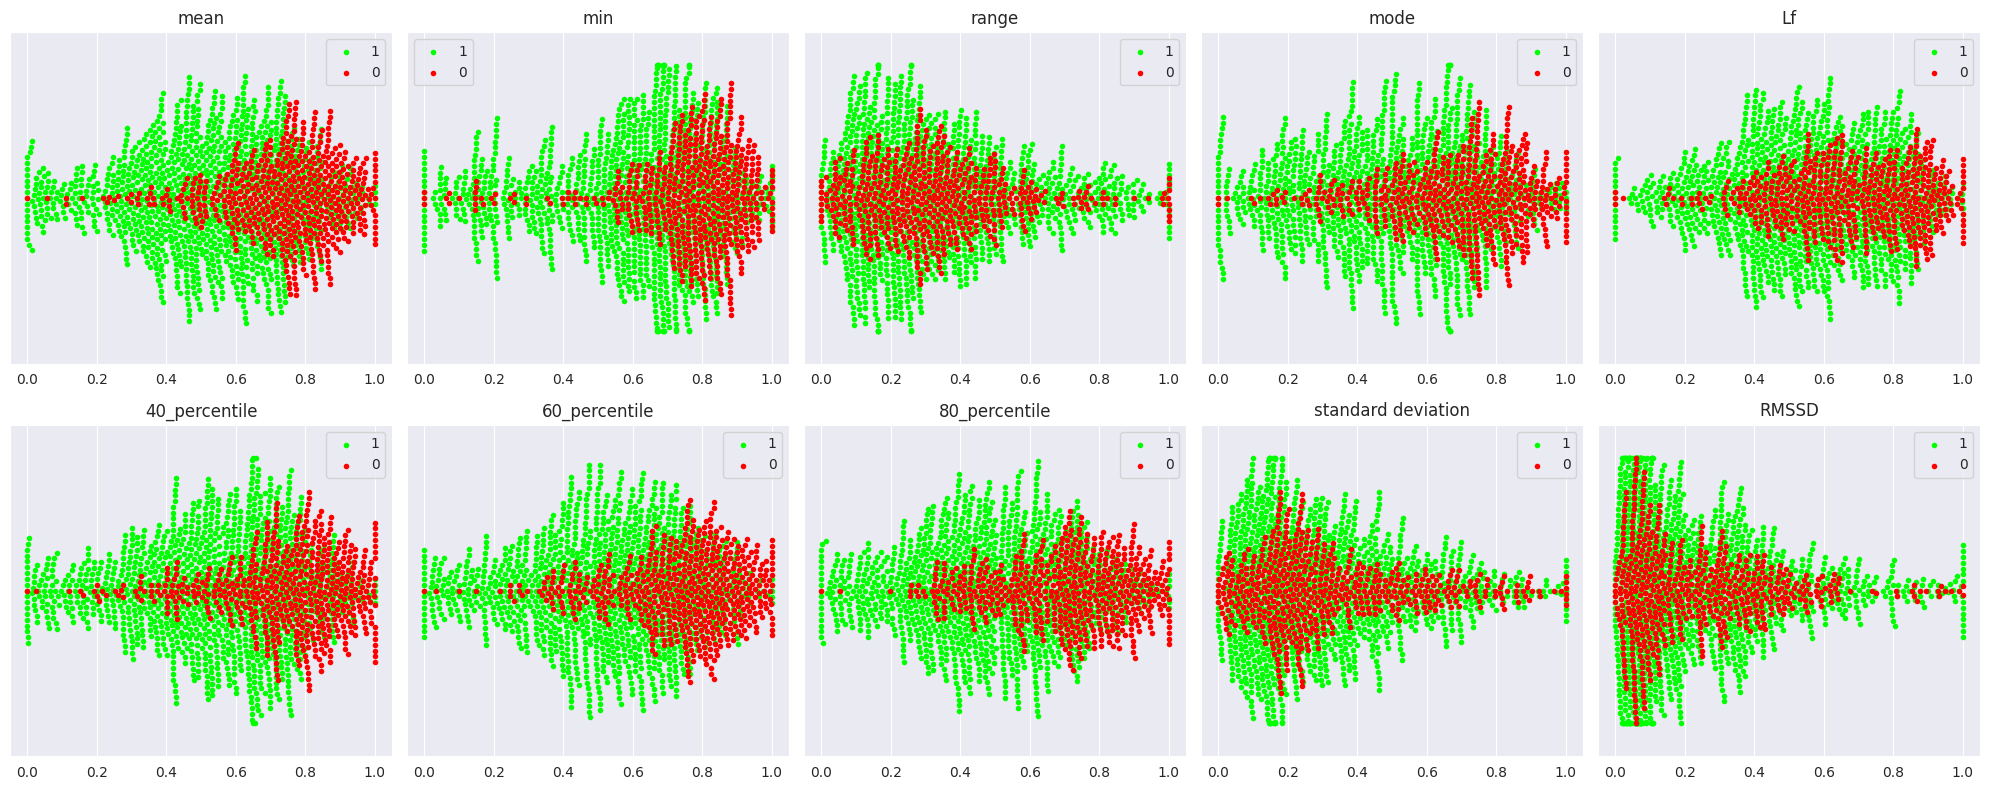

In [12]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

good_features = ['mean', 'min', 'range', 'mode', 'Lf', '40_percentile', '60_percentile', '80_percentile', 'standard deviation', 'RMSSD']

labels = []
dataX = []
for path in paths:
    temp = load_data([path])
    labels_temp = temp[:, feature_map['EventType']]
    temp = temp[:, :-1]
    # 0-1 normalization
    temp -= temp.min(axis=0)
    temp /= temp.max(axis=0)
    dataX.append(temp)
    labels.append(labels_temp)

dataX = np.concatenate(dataX, axis=0)
labels = np.concatenate(labels, axis=0)

print(dataX.shape, labels.shape)
print(dataX[0], labels[:10])
    
# dataX = load_data(paths)
# labels = dataX[:, feature_map['EventType']]
positive_labels = labels == 1

if len(good_features) != 10:
    assert "Change the figure configuration in the next line if the number of features used are not 10"

fig, ax = plt.subplots(2, 5, figsize=(20, 8))
ax = np.array(ax)
ax = ax.flatten()

for i, feature in enumerate(good_features):
    data_feature = dataX[:, feature_map[feature]]
    sns.swarmplot(x=data_feature[positive_labels], label='1', s=4, color='lime', ax=ax[i])
    sns.swarmplot(x=data_feature[~positive_labels], label='0', s=4, color='red', ax=ax[i])
    ax[i].set_title(feature)
fig.tight_layout()
plt.show()

In [ ]:
labels

# Random Forest Feature importance

In [ ]:
import time

import numpy as np

start_time = time.time()
importances = rf_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

In [ ]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names[:-1])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()